Iteration    0: Cost 16380.55   
Iteration 10000: Cost    19.19   
Iteration 20000: Cost    19.18   
Iteration 30000: Cost    19.17   
Iteration 40000: Cost    19.17   
Iteration 50000: Cost    19.17   
Iteration 60000: Cost    19.16   
Iteration 70000: Cost    19.16   
Iteration 80000: Cost    19.15   
Iteration 90000: Cost    19.15   
w,b found by gradient descent: w: [ 0.39824701 18.10534084 16.48499227  7.58661621 -1.27778991 -6.62948837
 -7.64776754 -5.16057128 -0.8717185   3.20032915  5.1054376   3.19533041
 -3.76332409], b: 200.5225


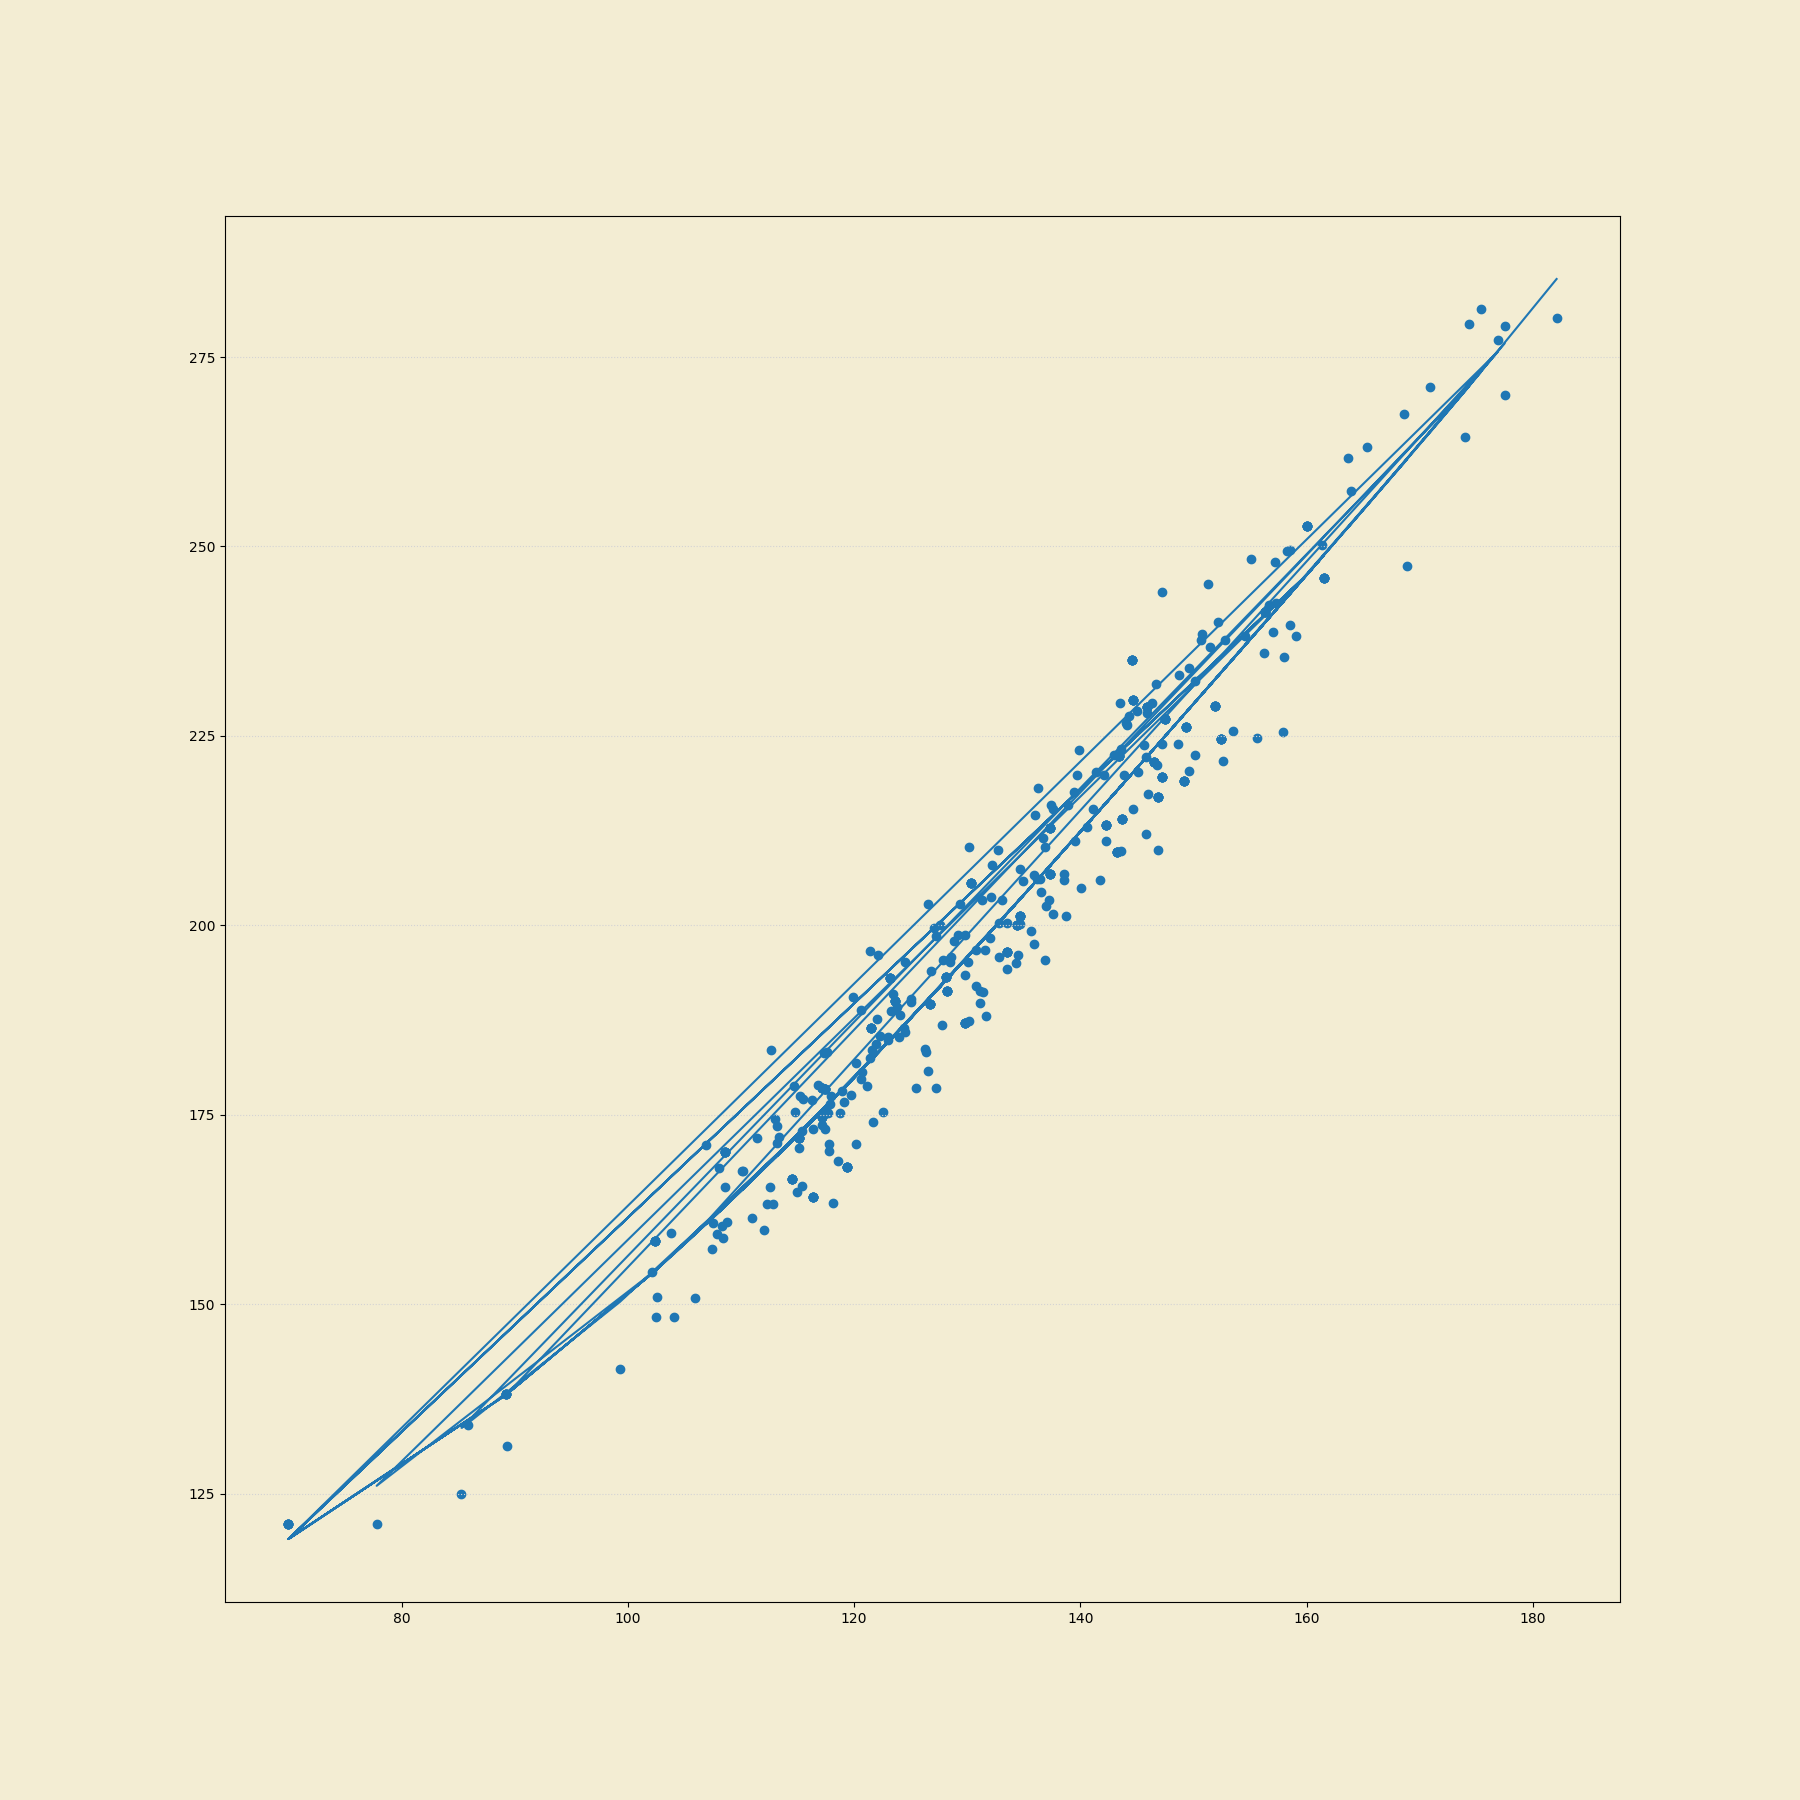

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd

def run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-6):
    m,n = X.shape
    # initialize parameters
    initial_w = np.zeros(n)
    initial_b = 0
    w_out, b_out, hist_out = gradient_descent(X ,y, initial_w, initial_b, compute_cost, compute_gradient_matrix, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.4f}")
    
    return(w_out, b_out)

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    J_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    
    for i in range(num_iters):
        dj_db,dj_dw = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
        if i<100000:      
            J_history.append( cost_function(X, y, w, b))
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
    return w, b, J_history 

def compute_gradient(X, y, w, b): 
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] += err * X[i, j]    
        dj_db += err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                 
    return dj_db, dj_dw

def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    X_norm = (X - mu) / sigma      

    return X_norm

def compute_cost(X, y, w, b): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

def compute_gradient_matrix(X, y, w, b): 
    m,n = X.shape
    f_wb = X @ w + b              
    e   = f_wb - y                
    dj_dw  = (1/m) * (X.T @ e)    
    dj_db  = (1/m) * np.sum(e)    
        
    return dj_db,dj_dw


df = pd.read_csv('LinReg.csv')
df_binary = df[['ACS', 'ADR']]
df_binary.columns = ['ACS', 'ADR']
df_binary.head()
x = np.array(df_binary['ADR']).reshape(-1,1)
y = np.array(df_binary['ACS'])

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000, alpha = 1e-1)

fig,ax = plt.subplots(figsize = (18,18))

plt.scatter(x, y)
plt.plot(x,X@model_w + model_b, label="Predicted Value")



fig.set_facecolor('#f3edd3')
ax.patch.set_facecolor('#f3edd3')
ax.grid(ls='dotted',lw=.8,color='lightgrey',axis='y',zorder=1)
plt.show()